# Predicting the optimum quotation price for the cars in a lot

### Project Scenario
You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

### The tasks assigned to you are as follows.

There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
a. Identify number of sales for each fuel type
b. Identify which transmission type has more price outliers
Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.
You decide to use Generative AI to create python codes that can help you analyse the data, determine the best features and create the prediction model as per requirement.

Disclaimer: This is a fictitious scenario created for the purpose of this project. The dataset being used is publicly available.

### About the Dataset
This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

### Attributes of this dataset have been explained below.

Variable	Description
model	Car model name
year	Year of car make
transmission	Type of transmission (Automatic, Manual or Semi-Auto)
mileage	Number of miles traveled
fuelType	The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other)
tax	Annual Tax payable in USD
mpg	Miles per Gallon that the car runs at
engineSize	Engine Size of the car
price	Price of car in USD

### Importing the Dataset

In [7]:
import pandas as pd
import numpy as np

# Example usage
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"  # replace with your file path
df = pd.read_csv(file_path)

In [8]:
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


### Data Preparation

In [10]:
# Identify columns with missing values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64


In [11]:
# Replace missing values with mean of the column
ave_tax = df['tax'].mean()
df['tax'].replace(np.NaN,ave_tax,inplace=True)


In [12]:
missing_values = df.isnull().sum()
print(missing_values)

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


In [13]:
# Delete duplicate entries
df = df.drop_duplicates()
print("\nDataframe after removing duplicates:")
df.head()



Dataframe after removing duplicates:


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


### Data Augmentation

In [15]:
#Synthetic data generated using mostly.ai

# Load the two CSV files into dataframes
file2 = r"C:\Users\maryh\OneDrive\Documents\LEARNING & DEVELOPMENT\Data Science\IBM Data Science Professional Certificate\11. Generative AI in data science\Datasets\used_car_price_analysis2.csv"

df1 = df
df2 = pd.read_csv(file2)

# Combine the dataframes
combined_df = pd.concat([df1, df2])

# Reset the index (optional)
combined_df = combined_df.reset_index(drop=True)

# Show the combined dataframe
print(combined_df.head())

# Save the combined dataframe to a new CSV file (optional)
combined_df.to_csv("combined_file.csv", index=False)


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35778 entries, 0 to 35777
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         35778 non-null  object 
 1   year          35778 non-null  int64  
 2   transmission  35778 non-null  object 
 3   mileage       35778 non-null  int64  
 4   fuelType      35778 non-null  object 
 5   tax           35778 non-null  float64
 6   mpg           35778 non-null  float64
 7   engineSize    35778 non-null  float64
 8   price         35778 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 2.5+ MB


In [17]:
print(df.shape)
print(combined_df.shape)

(17812, 9)
(35778, 9)


In [18]:
combined_df = combined_df.drop_duplicates()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35778 entries, 0 to 35777
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         35778 non-null  object 
 1   year          35778 non-null  int64  
 2   transmission  35778 non-null  object 
 3   mileage       35778 non-null  int64  
 4   fuelType      35778 non-null  object 
 5   tax           35778 non-null  float64
 6   mpg           35778 non-null  float64
 7   engineSize    35778 non-null  float64
 8   price         35778 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 2.5+ MB


### Data Insights and Visualization

In [20]:

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(combined_df, columns=['model','fuelType','transmission'])

# Ensure the one-hot encoded columns are float type
df_encoded = df_encoded.astype(float)

# Show the dataframe with one-hot encoded columns as float type
print(df_encoded.head())



     year  mileage    tax   mpg  engineSize    price  model_ B-MAX  \
0  2017.0  15944.0  150.0  57.7         1.0  12000.0           0.0   
1  2018.0   9083.0  150.0  57.7         1.0  14000.0           0.0   
2  2017.0  12456.0  150.0  57.7         1.0  13000.0           0.0   
3  2019.0  10460.0  145.0  40.3         1.5  17500.0           0.0   
4  2019.0   1482.0  145.0  48.7         1.0  16500.0           0.0   

   model_ C-MAX  model_ EcoSport  model_ Edge  ...  model__RARE_  \
0           0.0              0.0          0.0  ...           0.0   
1           0.0              0.0          0.0  ...           0.0   
2           0.0              0.0          0.0  ...           0.0   
3           0.0              0.0          0.0  ...           0.0   
4           0.0              0.0          0.0  ...           0.0   

   fuelType_Diesel  fuelType_Electric  fuelType_Hybrid  fuelType_Other  \
0              0.0                0.0              0.0             0.0   
1              0.0    

In [21]:
df_encoded.head()

,year,mileage,tax,mpg,engineSize,price,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model__RARE_,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType__RARE_,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,2017.0,15944.0,150.0,57.7,1.0,12000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2018.0,9083.0,150.0,57.7,1.0,14000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2017.0,12456.0,150.0,57.7,1.0,13000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2019.0,10460.0,145.0,40.3,1.5,17500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2019.0,1482.0,145.0,48.7,1.0,16500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35778 entries, 0 to 35777
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          35778 non-null  float64
 1   mileage                       35778 non-null  float64
 2   tax                           35778 non-null  float64
 3   mpg                           35778 non-null  float64
 4   engineSize                    35778 non-null  float64
 5   price                         35778 non-null  float64
 6   model_ B-MAX                  35778 non-null  float64
 7   model_ C-MAX                  35778 non-null  float64
 8   model_ EcoSport               35778 non-null  float64
 9   model_ Edge                   35778 non-null  float64
 10  model_ Escort                 35778 non-null  float64
 11  model_ Fiesta                 35778 non-null  float64
 12  model_ Focus                  35778 non-null  float64
 13  m

In [23]:
df_encoded.corr()

,year,mileage,tax,mpg,engineSize,price,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model__RARE_,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType__RARE_,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
year,1.000000,-0.653588,0.333526,-0.064706,-0.138077,0.605135,-0.059200,-0.067072,0.081544,0.013417,...,-0.006280,-0.095399,-0.003098,0.010903,-0.004725,0.094392,-0.000191,0.026857,-0.020453,-0.001028
mileage,-0.653588,1.000000,-0.249571,0.112221,0.221251,-0.486200,0.012497,0.035421,-0.088046,0.006723,...,0.007322,0.233850,-0.002325,-0.002010,-0.000962,-0.233146,-0.003104,-0.031609,0.032924,-0.011801
tax,0.333526,-0.249571,1.000000,-0.474569,0.159091,0.398544,-0.042547,-0.106029,0.089898,0.062357,...,-0.003864,-0.088183,-0.014239,0.009036,-0.010068,0.087589,-0.000042,0.139464,-0.161204,0.075490
mpg,-0.064706,0.112221,-0.474569,1.000000,-0.244300,-0.328405,-0.042425,0.011210,-0.129176,-0.109766,...,-0.000754,0.239405,0.007225,0.037727,0.005109,-0.242255,-0.008149,-0.227580,0.290841,-0.164023
engineSize,-0.138077,0.221251,0.159091,-0.244300,1.000000,0.390862,-0.032057,0.019146,-0.142409,0.160147,...,0.016390,0.670397,0.011588,0.059236,0.008194,-0.675245,0.018027,0.159136,-0.217858,0.135986
price,0.605135,-0.486200,0.398544,-0.328405,0.390862,1.000000,-0.100341,-0.078034,0.016142,0.211245,...,-0.000676,0.228388,0.005490,0.066714,0.001682,-0.234264,0.010968,0.185661,-0.229384,0.122221
model_ B-MAX,-0.059200,0.012497,-0.042547,-0.042425,-0.032057,-0.100341,1.000000,-0.023881,-0.036477,-0.014697,...,-0.004139,-0.043633,-0.001051,-0.005712,-0.000743,0.044137,-0.001820,-0.008373,-0.018934,0.037521
model_ C-MAX,-0.067072,0.035421,-0.106029,0.011210,0.019146,-0.078034,-0.023881,1.000000,-0.044101,-0.017768,...,-0.005004,0.076625,-0.001270,-0.002735,-0.000898,-0.076530,0.010869,0.007478,-0.015634,0.014321
model_ EcoSport,0.081544,-0.088046,0.089898,-0.129176,-0.142409,0.016142,-0.036477,-0.044101,1.000000,-0.027141,...,-0.007643,-0.102884,-0.001941,-0.010548,-0.001372,0.103776,-0.003361,-0.027927,0.014087,0.011623
model_ Edge,0.013417,0.006723,0.062357,-0.109766,0.160147,0.211245,-0.014697,-0.017768,-0.027141,1.000000,...,-0.003079,0.152114,-0.000782,0.009069,-0.000553,-0.152596,-0.001354,0.067411,-0.118343,0.095902


In [24]:

target_attribute = 'price'

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlations with the target attribute
target_correlation = correlation_matrix[target_attribute].drop(target_attribute)

# Identify the top 5 attributes with the highest correlation to the target attribute
top_5_attributes = target_correlation.abs().sort_values(ascending=False).head(5)

print("Top 5 attributes with highest correlation to the target attribute ({}):".format(target_attribute))
print(top_5_attributes)


Top 5 attributes with highest correlation to the target attribute (price):
year             0.605135
mileage          0.486200
tax              0.398544
engineSize       0.390862
model_ Fiesta    0.331090
Name: price, dtype: float64


In [25]:
#confirming
df_encoded[['mileage','price']].corr()

,mileage,price
mileage,1.0000,-0.4862
price,-0.4862,1.0000


<Figure size 2000x1000 with 0 Axes>

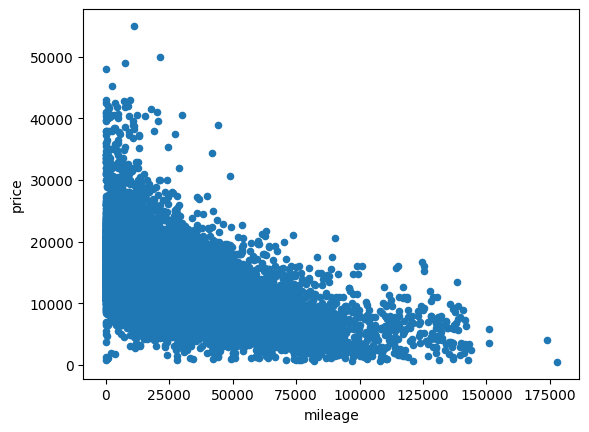

In [26]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
df_encoded[['mileage','price']].plot(kind='scatter', x='mileage' , y='price')

plt.show()

In [27]:
# Count the number of entries for each unique value of the 'fuelType' attribute 
value_counts = combined_df['fuelType'].value_counts()
print(value_counts)

fuelType
Petrol      24638
Diesel      11072
Hybrid         59
_RARE_          6
Electric        2
Other           1
Name: count, dtype: int64


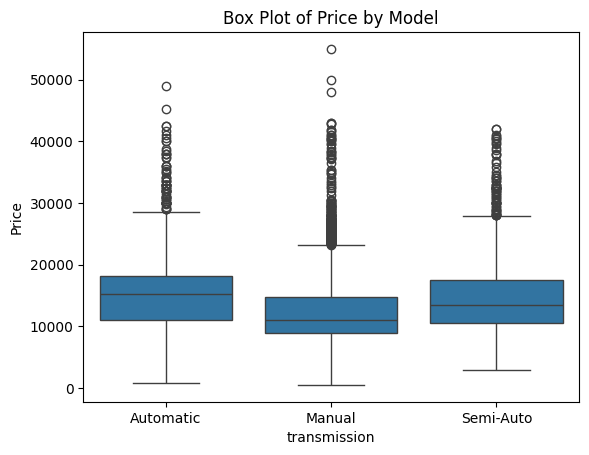

In [28]:
#Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot between 'transmission' (source attribute) and 'price' (target attribute)
sns.boxplot(x='transmission', y='price', data=combined_df) #using original augmented df

# Add a title and labels
plt.title('Box Plot of Price by Model')
plt.xlabel('transmission')
plt.ylabel('Price')

# Display the plot
plt.show()


<Axes: xlabel='mpg', ylabel='price'>

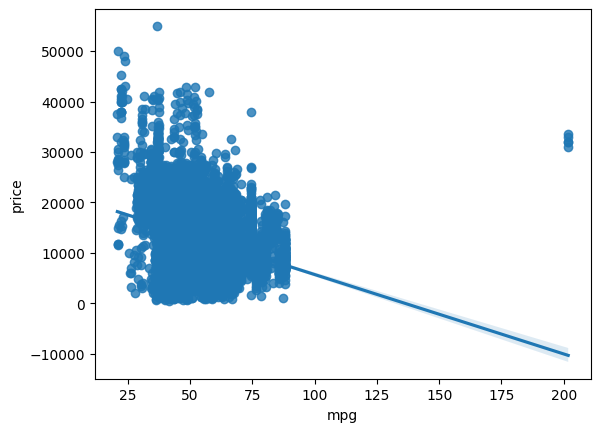

In [29]:
#Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
sns.regplot(data=combined_df,x='mpg',y='price')

<Figure size 1600x800 with 0 Axes>

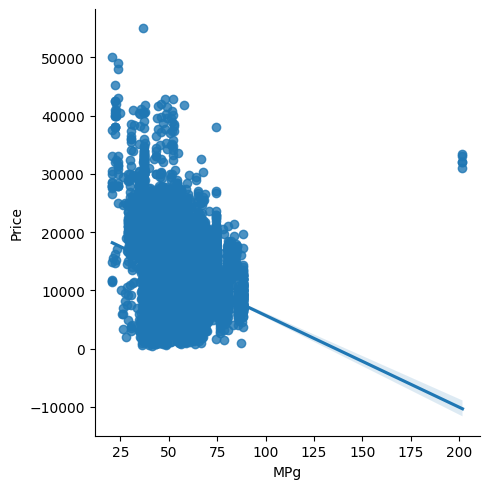

In [52]:
#copilot
# Create a regression plot between 'year' (source attribute) and 'price' (target attribute)
plt.figure(figsize=(16,8))
sns.lmplot(x='mpg', y='price', data=combined_df)

# Add a title and labels

plt.xlabel('MPg')
plt.ylabel('Price')

# Display the plot
plt.show()


In [58]:
import pandas as pd
from scipy.stats import pearsonr

# Sample dataframe
#combined_df = original + synthetic data

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, p_value = pearsonr(combined_df['mpg'], combined_df['price'])

print("Pearson correlation coefficient:", pearson_corr)
print("P-value:", p_value)


Pearson correlation coefficient: -0.32840531700454345
P-value: 0.0


In [ ]:
#p_value =0.05 , means we are 95% confident that the correlation between the variables is significant.
# p-value is < 0.001: we say there is strong evidence that the correlation is significant.
# the p-value is < 0.05: there is moderate evidence that the correlation is significant.
# the p-value is < 0.1: there is weak evidence that the correlation is significant.
# the p-value is > 0.1: there is no evidence that the correlation is significant.

# Pearson correlation coefficient, r, is measure of the strength of a linear association between two variables and is denoted by r
#can take a range of values from +1 to -1. 
# A value of 0 indicates that there is no association between the two variables. 
# A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. 
# A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases. 


In [78]:
combined_df[['mpg','price']].corr()
#corr is same as pearsonr
#This method only computes the correlation coefficients, not the corresponding p-values.



,mpg,price
mpg,1.000000,-0.328405
price,-0.328405,1.000000


In [84]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df):
    # Only keep numerical features
    numerical_df = df.select_dtypes(include=[np.number])

    # Add a constant to the model (required by statsmodels)
    numerical_df = numerical_df.assign(constant=1)

    # Calculate VIF for each feature
    vif = pd.DataFrame()
    vif["Feature"] = numerical_df.columns
    vif["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]
    
    # Remove the constant from VIF results
    vif = vif[vif["Feature"] != "constant"]

    return vif

# Example dataframe


# Calculate VIF
vif_df = calculate_vif(combined_df)

print("Variance Inflation Factors (VIF):")
print(vif_df)

#Attributes with a VIF value greater than 10 (a commonly used threshold) are considered to have significant multicollinearity and may need further attention.
#VIF works by quantifying how much the variance of a regression coefficient is inflated due to correlations among predictors. 

Variance Inflation Factors (VIF):
      Feature       VIF
0        year  2.584238
1     mileage  2.021331
2         tax  1.487998
3         mpg  1.423845
4  engineSize  1.817114
5       price  2.941211


In [112]:
#To check for multicollinearity between two variables in a dataframe, you can calculate the Pearson correlation coefficient. 
#High correlation indicates multicollinearity. 
corr, p_value = pearsonr(df['engineSize'], df['mpg']) 
print(f"Pearson correlation coefficient between 'variable1' and 'variable2': {corr}") 
print(f"P-value: {p_value}")

Pearson correlation coefficient between 'variable1' and 'variable2': -0.2622389435392932
P-value: 6.499045787089181e-278
